![](https://cienciadosdados.com/images/logo/logo_aprovada-01.png)

# Máquinas Preditivas - Template de Machine Learning
![](https://c.tenor.com/M70b-fssKtcAAAAM/luke-lukeskywalker.gif)

#**Pipeline da Ciência de Dados - 5 ou 6 grandes Passos**

# 1° Entender o Problema de Negócio:

Construir uma Máquina Preditiva de aprendizado de máquina para prever com precisão se os pacientes no conjunto de dados têm ou não diabetes

#2° Análise Exploratória dos Dados
Fonte de Dados:

https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [16]:
# Importar Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb

In [ ]:
# Conexão com os Dados
dataset = pd.read_csv('/content/diabetes.csv')
dataset

In [4]:
#Dimensões
dataset.shape

(768, 9)

In [5]:
# Overview de Informações gerais do Dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#Teste de Missing

dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Verificar se Existe Registro Duplicado

dataset.duplicated().sum()

0

In [13]:
# Verificação das Estatísticas das Variáveis
dataset.describe()

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

Text(0.5, 0, 'Quantidade')

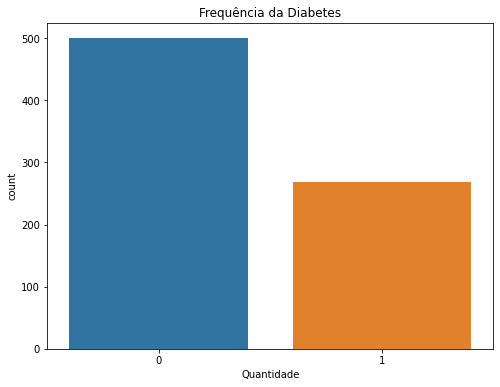

In [20]:
# Visualização Gráfica do Target
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Outcome", data=dataset)
plt.title('Frequência da Diabetes')
plt.xlabel('Quantidade')

# 3° Pré-Processamento dos Dados 

In [ ]:
# Separação das variáveis explicativas e do Target

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.head(1)

In [ ]:
# Separação das Variáveis Explicativas
x = dataset.values[ :  , :8]
x

In [ ]:
# Separação(split) do Target
y= dataset.values[ :  , 8]
y

In [30]:
# Amostragem: Separar dados para o Treino e para a avaliação da Máquina Preditiva (teste)

x_treino , x_Teste , y_treino , y_teste = train_test_split (x , y , test_size= 0.2 , random_state=7 )


In [ ]:
x_treino

In [ ]:
y_treino

# 4° Contruir Máquinas Preditivas

In [37]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [33]:
# Regressão Logistica

maquina_preditiva_rl = LogisticRegression()


In [45]:
# Lightgbm
maquina_preditiva_LGB = lgb.LGBMClassifier()


In [54]:
# Xgboost
maquina_preditiva_XGboost = xgb.XGBClassifier()

In [ ]:
#treinamento
ypred = maquina_preditiva_rl.fit(x_treino, y_treino)

In [46]:
#treinamento LGB
ypred = maquina_preditiva_LGB.fit(x_treino, y_treino)

In [55]:
#treinamento XGBOOST
ypred = maquina_preditiva_XGboost.fit(x_treino, y_treino)

# 5° Avaliação da Máquina Preditivas

In [44]:
# Avaliação da Regressão Logistica (Baseline)
result = maquina_preditiva_rl.score(x_Teste, y_teste)
result

0.7922077922077922

In [47]:
# Avaliação da LGBM
result = maquina_preditiva_LGB.score(x_Teste, y_teste)
result

0.7467532467532467

In [56]:
# Avaliação da XGboost
result = maquina_preditiva_XGboost.score(x_Teste, y_teste)
result

0.8116883116883117

# 6° Deploy - Implementa a Máquina - Webapp - Sistema Web

# Streamlit
# Flask
# Django
# GCP